# Part 2 Midterm ADTA 5550 Deep Learning with Big Data

In [29]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [30]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split   #Train and Test data
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import accuracy_score

In [31]:
# Load the dataset
data = pd.read_csv("pima_diabetes.csv")
                                 
data.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [32]:
# Assuming the data is in a CSV file without header
file_path = 'pima_diabetes.csv' # Replace with the path to your CSV file
column_names = ['Preg', 'Plas', 'Pres', 'Skin', 'Test', 'Mass', 'Pedi', 'Age', 'Class']

# Load the CSV file into a pandas DataFrame with the specified column names
pima_diabetes_dataframe = pd.read_csv(file_path, header=None, names=column_names)

# Now your dataframe will have the columns named as specified

In [33]:
pima_diabetes_dataframe.head()

,Preg,Plas,Pres,Skin,Test,Mass,Pedi,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# PART II: MLPs (Fully Connected Neural Networks) with Keras (50 Points)

In [34]:
# Perform integer encoding
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
#pima_diabetes_dataframe = pd.read_csv('/content/pima_diabetes.csv')

# Split the dataset into features and target
X = pima_diabetes_dataframe.drop(['Class'], axis=1)
y = pima_diabetes_dataframe['Class']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=42)

# Create and train the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(5,), max_iter=1000, alpha=0.01, random_state=42)
mlp.fit(X_train, y_train)

# Make predictions on the test set
y_pred = mlp.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Calculate normalized accuracy score
normalized_accuracy = accuracy_score(y_test, y_pred, normalize=True)

# Calculate normalized accuracy score
normalized_accuracy = accuracy_score(y_test, y_pred, normalize=True)


print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Normalized Accuracy: {:.2f}%".format(normalized_accuracy * 100))

Accuracy: 77.27%
Normalized Accuracy: 77.27%


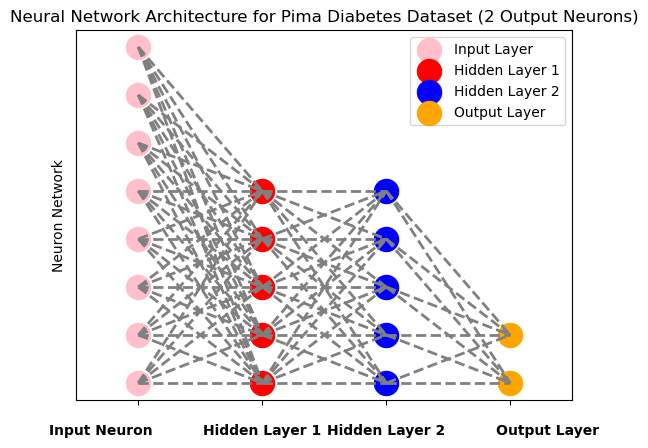

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Define the MLP classifier architecture
hidden_layer_sizes = (5, 5)  # Two hidden layers, each with 5 neurons
input_dim = 8  # Number of input features
output_dim = 2  # Number of output classes

# Create the figure and axis objects
fig, ax = plt.subplots()

# Plot the input layer
ax.scatter(np.zeros(input_dim), np.arange(input_dim), color='pink', label='Input Layer', s=300)
# Plot the first hidden layer
ax.scatter(np.ones(hidden_layer_sizes[0]) * 1, np.arange(hidden_layer_sizes[0]), color='red', label='Hidden Layer 1', s=300)
# Plot the second hidden layer
ax.scatter(np.ones(hidden_layer_sizes[1]) * 2, np.arange(hidden_layer_sizes[1]), color='blue', label='Hidden Layer 2', s=300)
# Plot the output layer
ax.scatter(np.ones(output_dim) * 3, np.arange(output_dim), color='orange', label='Output Layer', s=300)

# Connect the input layer to the first hidden layer
for i in range(input_dim):
    for j in range(hidden_layer_sizes[0]):
        ax.plot([0, 1], [i, j], color='gray', linewidth=2, linestyle='dashed')

# Connect the first hidden layer to the second hidden layer
for i in range(hidden_layer_sizes[0]):
    for j in range(hidden_layer_sizes[1]):
        ax.plot([1, 2], [i, j], color='gray', linewidth=2, linestyle='dashed')

# Connect the second hidden layer to the output layer
for i in range(hidden_layer_sizes[1]):
    for j in range(output_dim):
        ax.plot([2, 3], [i, j], color='gray', linewidth=2, linestyle='dashed')

# Add labels to the layers
ax.text(-0.3, -1, 'Input Neuron', ha='center', va='center', fontweight='bold')
ax.text(1, -1, 'Hidden Layer 1', ha='center', va='center', fontweight='bold')
ax.text(2, -1, 'Hidden Layer 2', ha='center', va='center', fontweight='bold')
ax.text(3.3, -1, 'Output Layer', ha='center', va='center', fontweight='bold')

# Set the axis limits and labels
ax.set_xlim(-0.5, 3.5)
ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(['', '', '', ''])
ax.set_yticks([])
ax.set_ylabel('Neuron Network')

ax.set_title('Neural Network Architecture for Pima Diabetes Dataset (2 Output Neurons)')

# Add a legend
ax.legend(loc='upper right')

# Show the plot
plt.show()


# MLP classifier architecture and Feature Names 

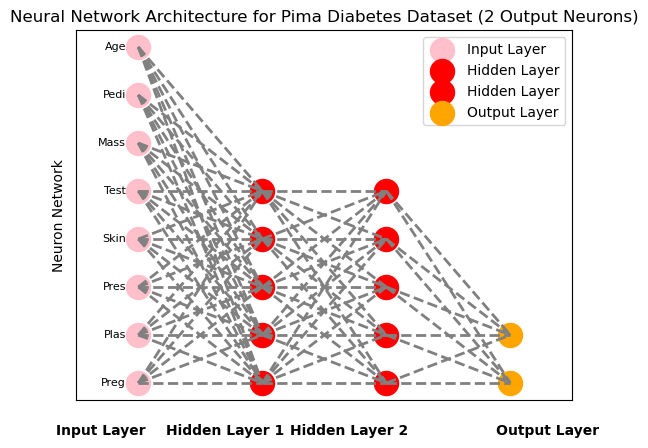

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Define the MLP classifier architecture
hidden_layer_sizes = (5, 5)  # Number of hidden units in each hidden layer
input_dim = 8  # Number of input features
output_dim = 2  # Number of output classes (assuming binary classification)

# Feature names for the input layer
feature_names = ['Preg', 'Plas', 'Pres', 'Skin', 'Test', 'Mass', 'Pedi', 'Age']

# Create the figure and axis objects
fig, ax = plt.subplots()

# Plot the input layer
input_neurons = ax.scatter(np.zeros(input_dim), np.arange(input_dim), color='pink', label='Input Layer', s=300)
# Plot the hidden layers
for layer in range(len(hidden_layer_sizes)):
    ax.scatter(np.ones(hidden_layer_sizes[layer]) * (layer + 1), np.arange(hidden_layer_sizes[layer]), color='red', label='Hidden Layer', s=300)
# Plot the output layer
ax.scatter(np.ones(output_dim) * (len(hidden_layer_sizes) + 1), np.arange(output_dim), color='orange', label='Output Layer', s=300)

# Connect the layers
for layer in range(len(hidden_layer_sizes) + 1):
    for i in range(input_dim if layer == 0 else hidden_layer_sizes[layer - 1]):
        for j in range(hidden_layer_sizes[layer] if layer < len(hidden_layer_sizes) else output_dim):
            ax.plot([layer, layer + 1], [i, j], color='gray', linewidth=2, linestyle='dashed')

# Add feature names to the input neurons
for i, name in enumerate(feature_names):
    ax.text(-0.1, i, name, ha='right', va='center', fontsize=8)

# Add labels to the layers
ax.text(-0.3, -1, 'Input Layer', ha='center', va='center', fontweight='bold')
for layer in range(len(hidden_layer_sizes)):
    ax.text(layer + 0.7, -1, f'Hidden Layer {layer + 1}', ha='center', va='center', fontweight='bold')
ax.text(len(hidden_layer_sizes) + 1.3, -1, 'Output Layer', ha='center', va='center', fontweight='bold')

# Set the axis limits and labels
ax.set_xlim(-0.5, len(hidden_layer_sizes) + 1.5)
ax.set_xticks([])
ax.set_yticks([])
ax.set_ylabel('Neuron Network')

ax.set_title('Neural Network Architecture for Pima Diabetes Dataset (2 Output Neurons)')

# Add a legend
ax.legend(loc='upper right')

# Show the plot
plt.show()


In [37]:
pima_diabetes_dataframe.head()

,Preg,Plas,Pres,Skin,Test,Mass,Pedi,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [38]:
#Ecploratory data analysis
print(pima_diabetes_dataframe.shape)

(768, 9)


In [39]:
print(pima_diabetes_dataframe.dtypes)

Preg       int64
Plas       int64
Pres       int64
Skin       int64
Test       int64
Mass     float64
Pedi     float64
Age        int64
Class      int64
dtype: object


In [40]:
# datset informatation
pima_diabetes_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Preg    768 non-null    int64  
 1   Plas    768 non-null    int64  
 2   Pres    768 non-null    int64  
 3   Skin    768 non-null    int64  
 4   Test    768 non-null    int64  
 5   Mass    768 non-null    float64
 6   Pedi    768 non-null    float64
 7   Age     768 non-null    int64  
 8   Class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Preprocess the dataset

In [41]:
# We can clean the dateset and missing values
pima_diabetes_dataframe.isnull().sum()

# Handle missing values if any
#data.dropna(inplace=True)


Preg     0
Plas     0
Pres     0
Skin     0
Test     0
Mass     0
Pedi     0
Age      0
Class    0
dtype: int64

In [42]:
# Find the columns name 
print(pima_diabetes_dataframe.columns)

Index(['Preg', 'Plas', 'Pres', 'Skin', 'Test', 'Mass', 'Pedi', 'Age', 'Class'], dtype='object')


# Perform the exploratory data analysis (EDA) in the dataset.

In [43]:
# print shape of dataset
print('Number of Instances : ', pima_diabetes_dataframe.shape[0])
print('Number of features : ', pima_diabetes_dataframe.shape[1])

Number of Instances :  768
Number of features :  9


In [44]:
# show statistical summary of numerical data
pima_diabetes_dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
Preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Plas,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
Pres,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
Skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Test,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
Mass,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
Pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [45]:
pima_diabetes_dataframe.describe()

,Preg,Plas,Pres,Skin,Test,Mass,Pedi,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Univariate Analysis

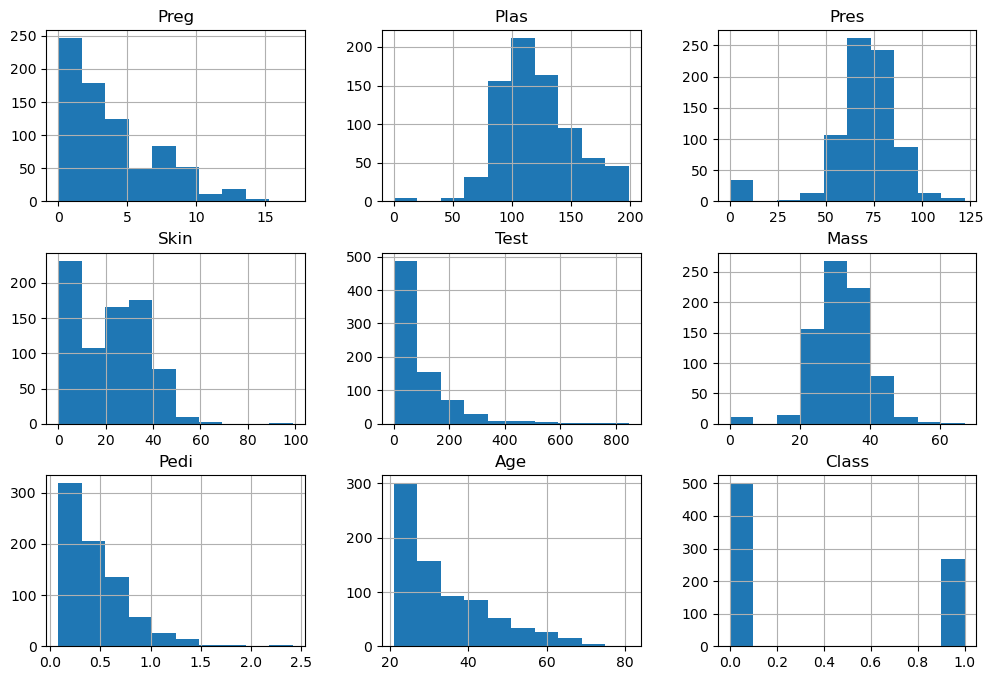

In [46]:
# Histogram 
pima_diabetes_dataframe.hist(figsize=(12,8))
pyplot.show()

# Scatter Plots 

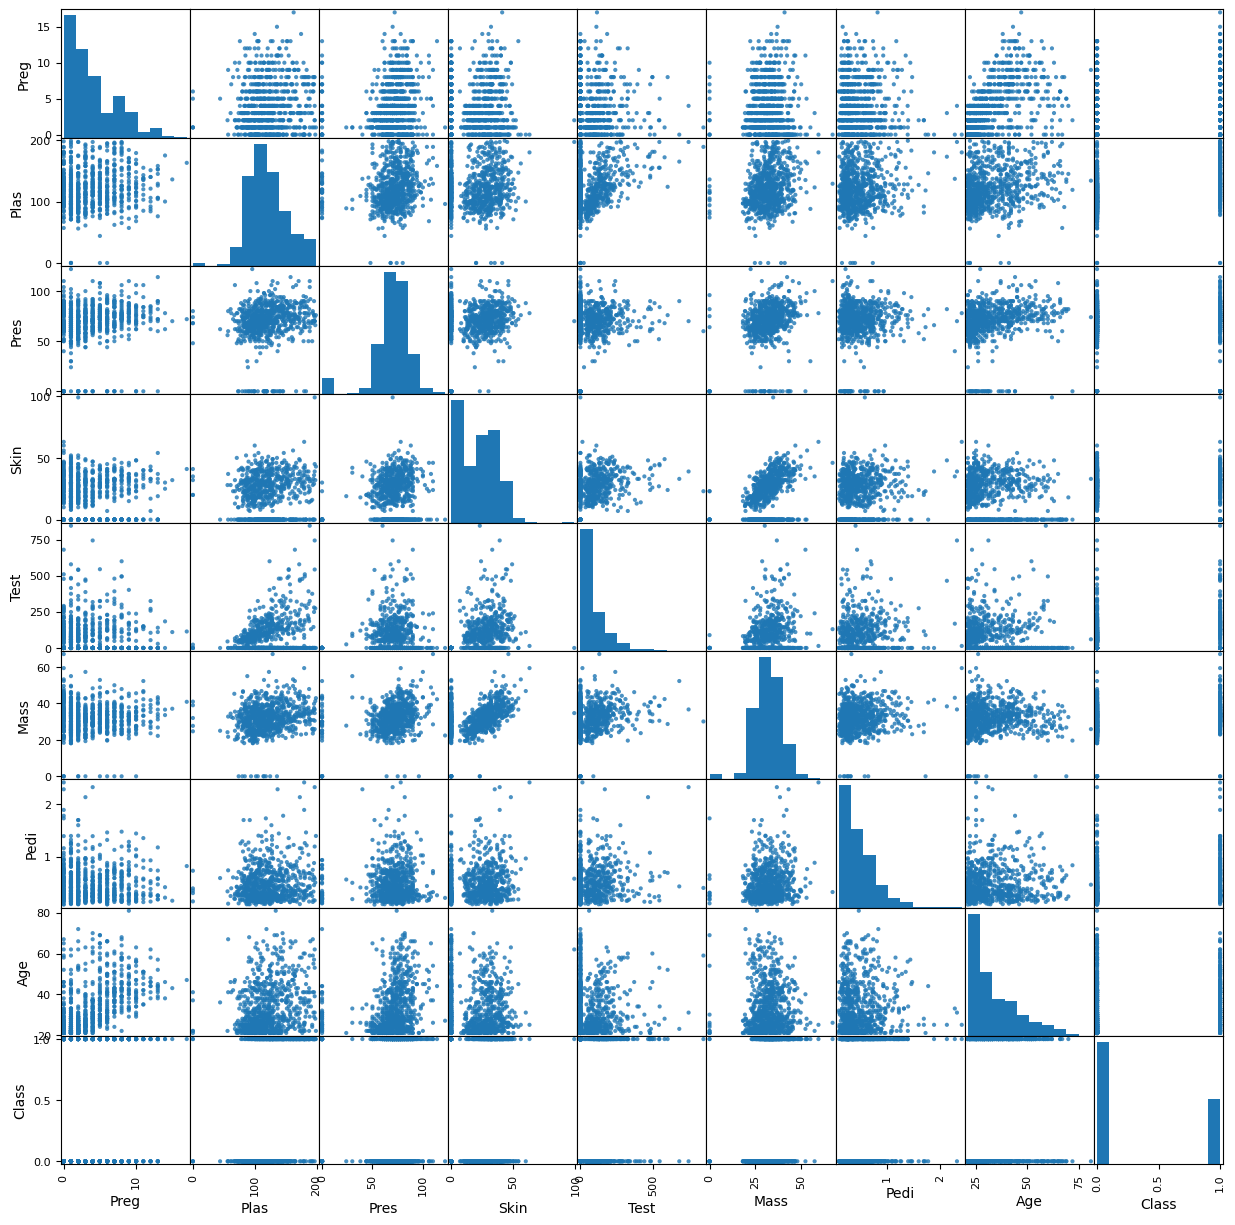

In [47]:
# Scatter plots 
scatter_matrix(pima_diabetes_dataframe, alpha=0.8, figsize=(15,15))
pyplot.show()

# MLP Model

In [48]:
#Designing an MLP model.
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [49]:
# Create the KerasClassifier

model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=10, verbose=0)

# Evaluate the model using the 10-fold cross-validation

In [50]:
# Evaluate the model using 10-fold cross-validation

scores = cross_val_score(model, X, y, cv=10)
accuracy_training = np.mean(scores)
accuracy_training = np.std(scores)


accuracy_evaluation = np.mean(scores)
accuracy_evaluation = np.std(scores)


In [51]:
# Evaluate the model using cross-validation predictions
y_pred = cross_val_predict(model, X, y, cv=10)

accuracy_evaluation = accuracy_score(y, y_pred)
accuracy_tranining = accuracy_score(y, y_pred)


In [52]:
print("Accuracy level from the training process: %.2f%%" % (accuracy_training*100))
print("Accuracy level from the evaluation process: %.2f%%" % (accuracy_evaluation*100))


Accuracy level from the training process: 5.05%
Accuracy level from the evaluation process: 64.97%


In [53]:
print("Mean Cross-Validation Accuracy:", accuracy_training)
print("Standard Deviation of Cross-Validation Accuracy:", accuracy_evaluation)

Mean Cross-Validation Accuracy: 0.05047670667827923
Standard Deviation of Cross-Validation Accuracy: 0.6497395833333334


# Part 3 ADTA 5550 Deep Learning with Big Data

In [54]:
# Next File Part 3 

In [55]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [56]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split   #Train and Test data
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [57]:
# Load the dataset
import os 
cwd = os.getcwd()
print(cwd)
path = cwd + '/Data/'
print(path)
#df = path
file = path + 'pima_diabetes.csv'
#df = pd.read_csv(file, header=None).values

pima_diabetes_data = pd.read_csv("pima_diabetes.csv", header=None).values

#dataset = pd.read_csv(file, header=None).values

X = pima_diabetes_data[:, :-1]
y = pima_diabetes_data[:, -1]

# Preprocess the data
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = np.reshape(y, (-1, 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/home/yogchaudhary9/JPTR_NTBK
/home/yogchaudhary9/JPTR_NTBK/Data/


In [58]:
pima_diabetes_data

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [59]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.constraints import max_norm  # Import max_norm constraint

# Define the model architecture
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu', kernel_constraint=max_norm(3)))  # Example max_norm constraint
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu', kernel_constraint=max_norm(3)))  # Example max_norm constraint
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu', kernel_constraint=max_norm(3)))  # Example max_norm constraint
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Complie Model 

In [60]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [61]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Define the model
model = Sequential()

# Add the input layer
model.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))

# Add the first hidden layer
model.add(Dense(32, activation='relu'))

# Add dropout regularization
model.add(Dropout(0.2))

# Add the second hidden layer
model.add(Dense(32, activation='relu'))

# Add dropout regularization
model.add(Dropout(0.2))

# Add the output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train Model 

In [62]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Train on 614 samples, validate on 154 samples
Epoch 1/100
614/614 [==============================] - 2s 3ms/step - loss: 0.6593 - accuracy: 0.6221 - val_loss: 0.6228 - val_accuracy: 0.7013
Epoch 2/100
614/614 [==============================] - 0s 250us/step - loss: 0.5827 - accuracy: 0.7150 - val_loss: 0.5671 - val_accuracy: 0.7013
Epoch 3/100
614/614 [==============================] - 0s 247us/step - loss: 0.5232 - accuracy: 0.7508 - val_loss: 0.5335 - val_accuracy: 0.7338
Epoch 4/100
614/614 [==============================] - 0s 239us/step - loss: 0.5048 - accuracy: 0.7573 - val_loss: 0.5181 - val_accuracy: 0.7208
Epoch 5/100
614/614 [==============================] - 0s 240us/step - loss: 0.4798 - accuracy: 0.7557 - val_loss: 0.5176 - val_accuracy: 0.7208
Epoch 6/100
614/614 [==============================] - 0s 265us/step - loss: 0.4631 - accuracy: 0.7671 - val_loss: 0.5150 - val_accuracy: 0.7403
Epoch 7/100
614/614 [==============================] - 0s 281us/step - loss: 0.4677 - 

# Evaluate Model 

In [63]:
# Evaluate the model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

154/154 [==============================] - 0s 140us/step
Accuracy: 73.38


In [64]:
# cross-validation model 
print(" Cross-Validation Accuracy Training: ", _, accuracy )
#print(" Mean Cross-Validation Accuracy Evaluation: ", _, accuracy.mean() )

 Cross-Validation Accuracy Training:  0.6971944671172601 0.7337662577629089


In [65]:
# pleases Feedback and Thank you somuch  